In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import re
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df=pd.read_csv('C:\\Users\\Azhar\\portfolio pjt 1\\AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
dd = pd.DataFrame({'Date': pd.to_datetime(df['last_review'])})
L = ['year', 'month', 'day']
date_gen = (getattr(dd['Date'].dt, i).rename(i) for i in L)
df = df.join(pd.concat(date_gen, axis=1))

In [9]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaN,NaN,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaN,NaN,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaN,NaN,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaN,NaN,NaN


# Univariate EDA

Text(0.5, 1.0, 'Neighnourhood Groups')

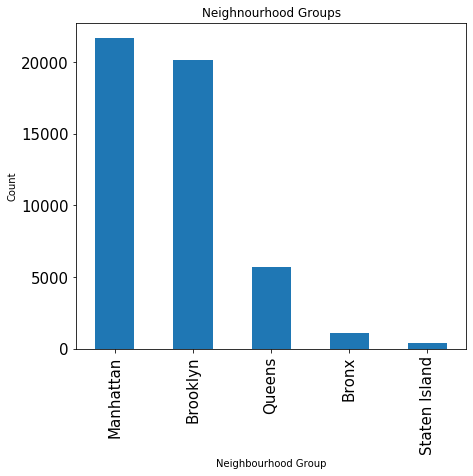

In [10]:
aa = df["neighbourhood_group"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)
aa.set_xlabel("Neighbourhood Group")
aa.set_ylabel("Count")
aa.set_title("Neighnourhood Groups")

In [11]:
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Woodrow                  1
Richmondtown             1
Fort Wadsworth           1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

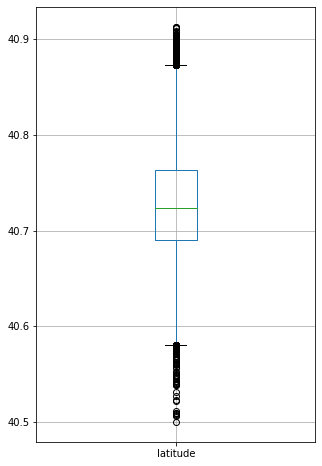

In [12]:
b1=df.boxplot(column = 'latitude',figsize=(5,8),showfliers=True)
plt.show()

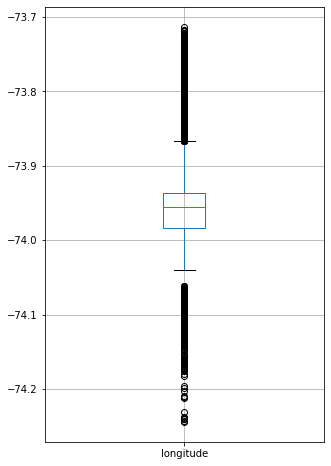

In [13]:
b2=df.boxplot(column = 'longitude',figsize=(5,8),showfliers=True)
plt.show()

Text(0.5, 1.0, 'Room Types')

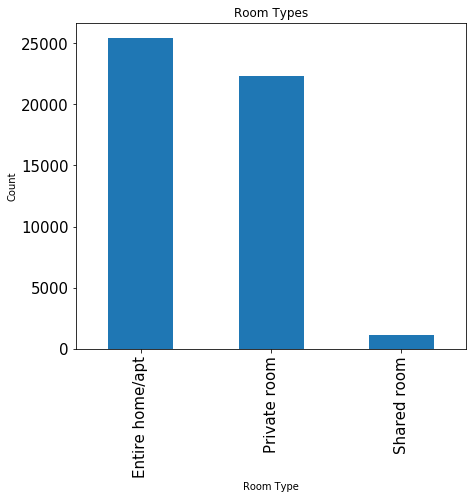

In [14]:
ac = df["room_type"].value_counts().plot(kind="bar", figsize=(7,6), fontsize=15)
ac.set_xlabel("Room Type")
ac.set_ylabel("Count")
ac.set_title("Room Types")

In [15]:
from scipy.stats import shapiro,normaltest
from statsmodels.graphics.gofplots import qqplot

In [16]:
def normality_plots(df, col):
    fig = plt.figure(figsize=(15, 5))
    shapiro_p = round(shapiro(df[col])[1], 2)
    normaltest_p = round(normaltest(df[col])[1], 2)
    plt.subplot(1, 3, 1)
    plt.title('Histogram for '+col, color='navy', fontsize=12)
    plt.hist(df[col])
    plt.subplot(1, 3, 2)
    plt.title('Q-Q Plot for '+col, color='brown', fontsize=12)
    qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))
    plt.subplot(1, 3, 3)
    plt.title('Normality Test Results for '+col, color='olive', fontsize=12)
    plt.plot([shapiro_p, normaltest_p], linestyle=' ', marker='x')
    plt.text(x=0.2, y=0.5, s='Shapiro\np value\n'+str(shapiro_p))
    plt.text(x=0.6, y=0.5, s='Normaltest\np value\n'+str(normaltest_p))
    plt.ylim((0, 1))
    plt.hlines(y=0.05, color='r', xmin=0, xmax=1)
    plt.suptitle('Normality Test for '+col, fontsize=16, color='b')
    plt.show()

In [17]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year', 'month', 'day'],
      dtype='object')

In [18]:
dd = df.select_dtypes(exclude=['object'])

C:\Users\Azhar\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\Azhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


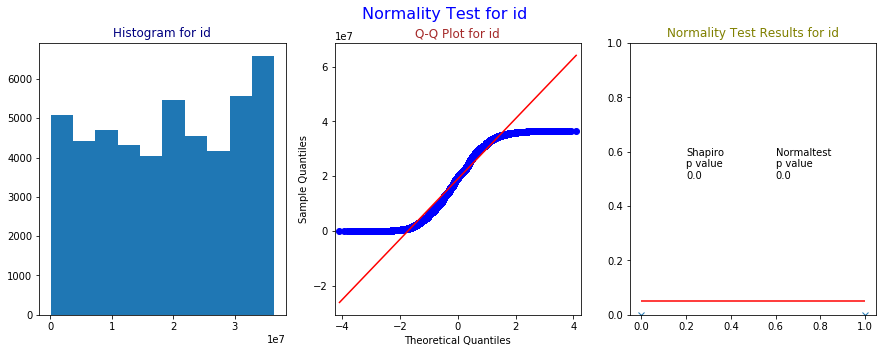

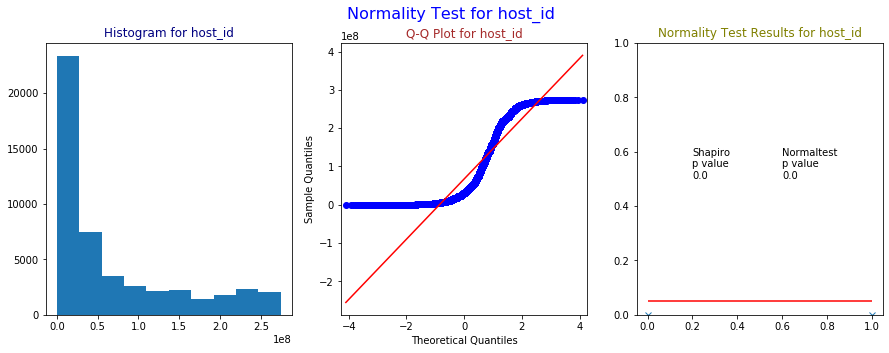

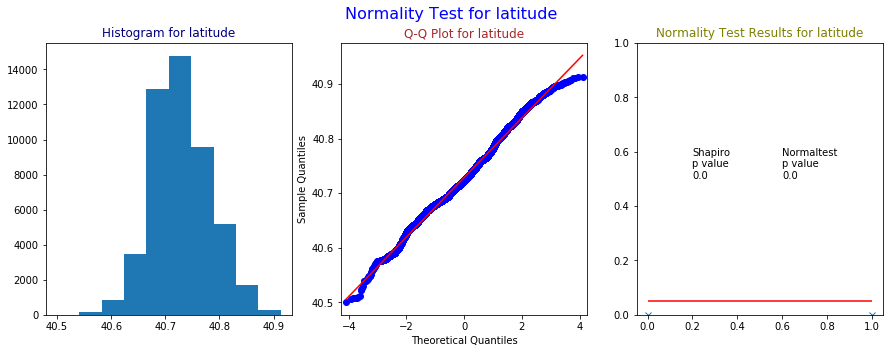

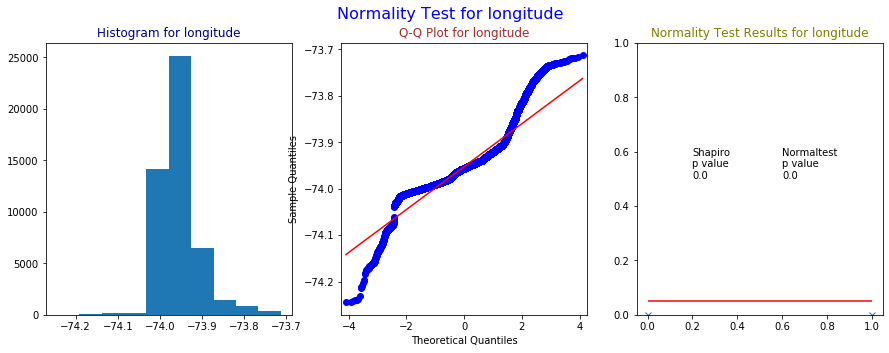

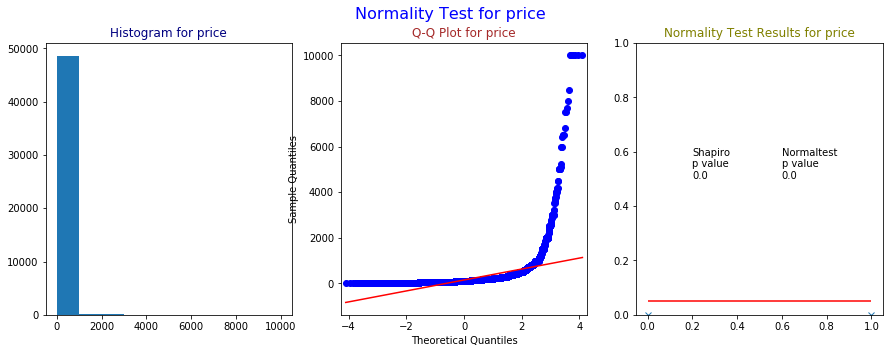

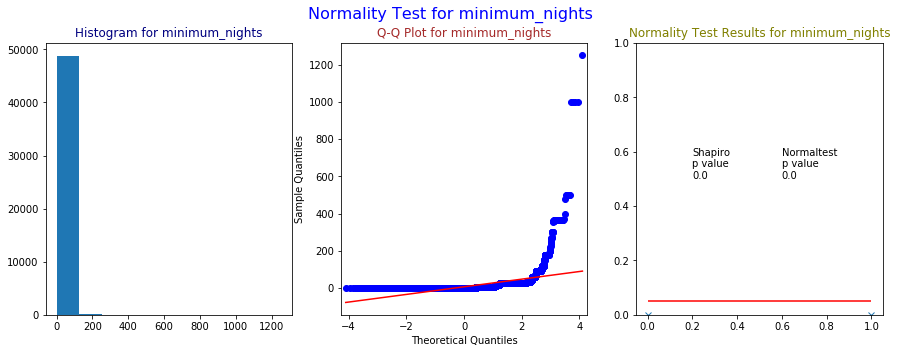

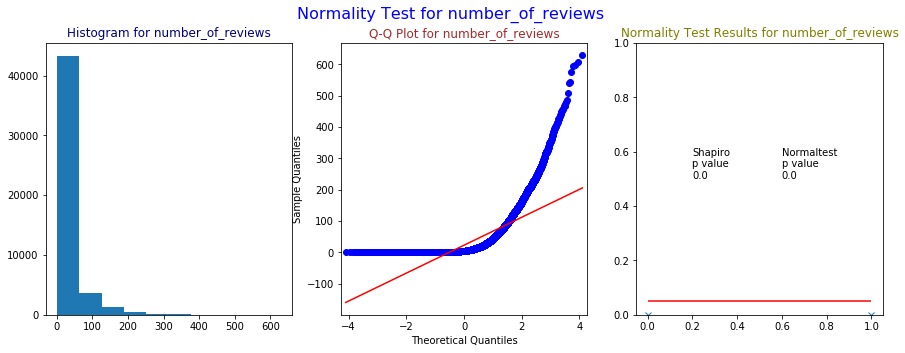

C:\Users\Azhar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Azhar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Azhar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\Azhar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1463: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,
C:\Users\Azhar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Azhar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


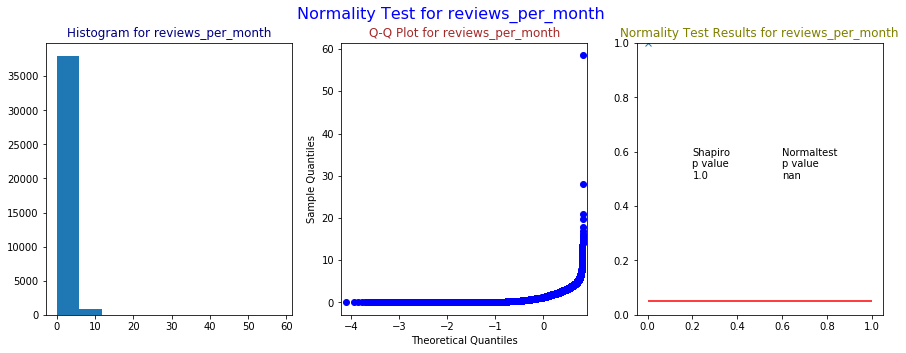

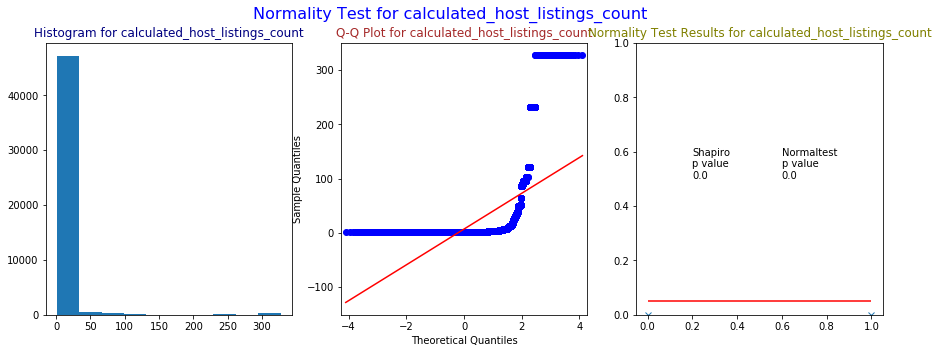

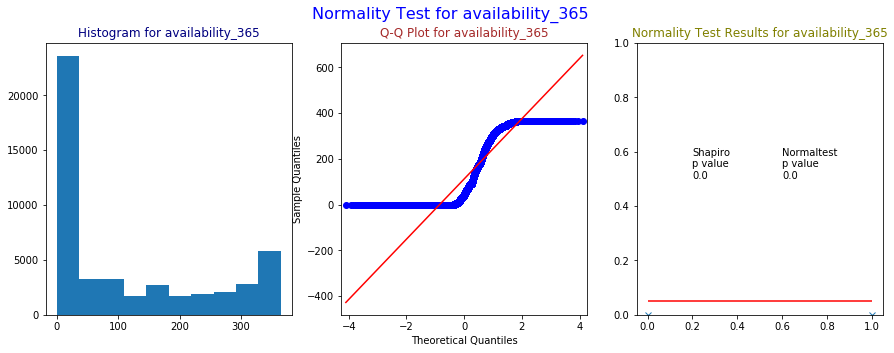

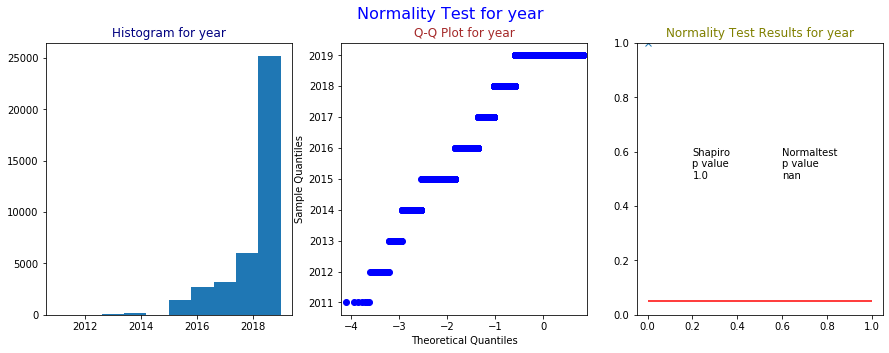

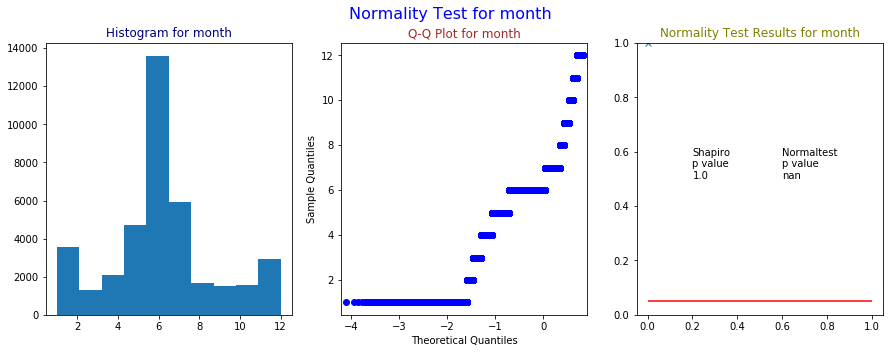

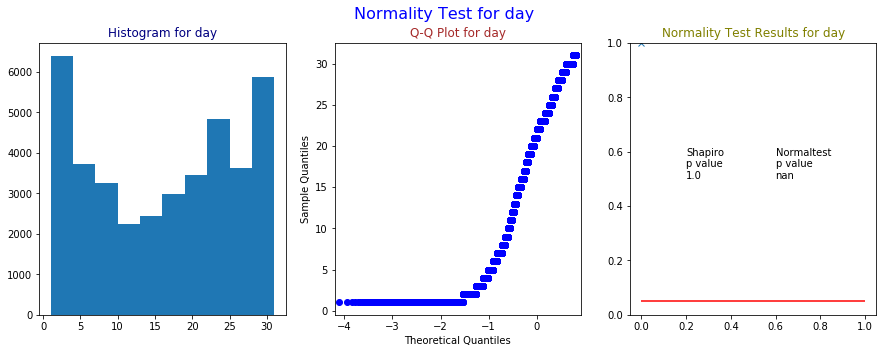

In [19]:
for d in dd.columns:
    normality_plots(dd, d)

In [20]:
df.skew()

id                                -0.090257
host_id                            1.206214
latitude                           0.237167
longitude                          1.284210
price                             19.118939
minimum_nights                    21.827275
number_of_reviews                  3.690635
reviews_per_month                  3.130189
calculated_host_listings_count     7.933174
availability_365                   0.763408
year                              -1.742074
month                              0.165896
day                               -0.078605
dtype: float64

# Bivariate EDA

In [21]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaN,NaN,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaN,NaN,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaN,NaN,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaN,NaN,NaN


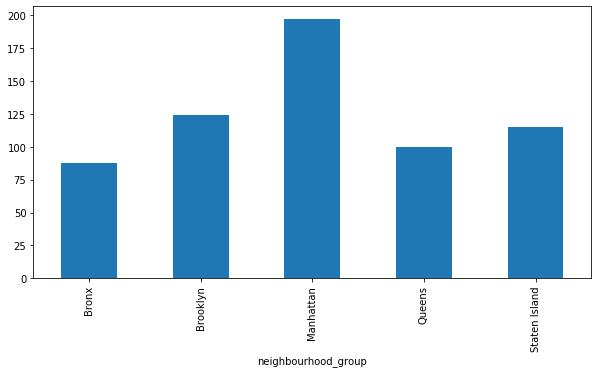

In [22]:
fig=plt.figure(figsize=(10,5))
df.groupby('neighbourhood_group')['price'].mean().plot(kind = 'bar')

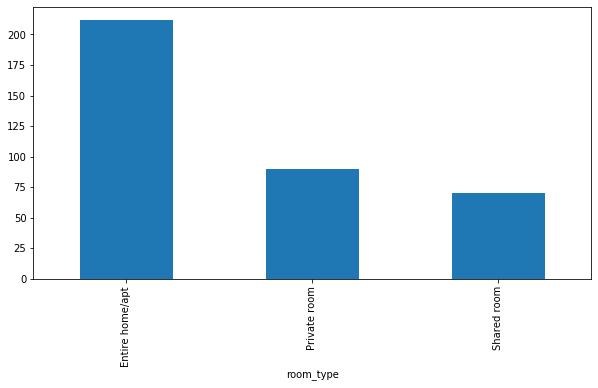

In [23]:
fig=plt.figure(figsize=(10,5))
df.groupby('room_type')['price'].mean().plot(kind = 'bar')

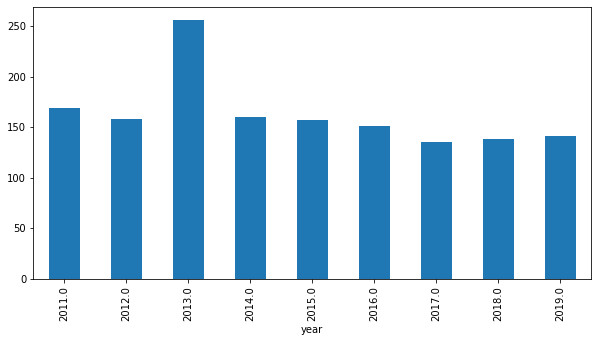

In [24]:
fig=plt.figure(figsize=(10,5))
df.groupby('year')['price'].mean().plot(kind = 'bar')

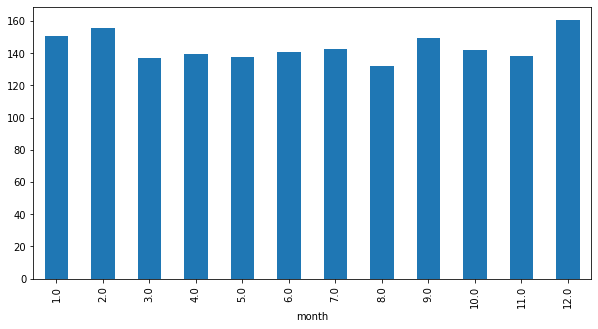

In [25]:
fig=plt.figure(figsize=(10,5))
df.groupby('month')['price'].mean().plot(kind = 'bar')

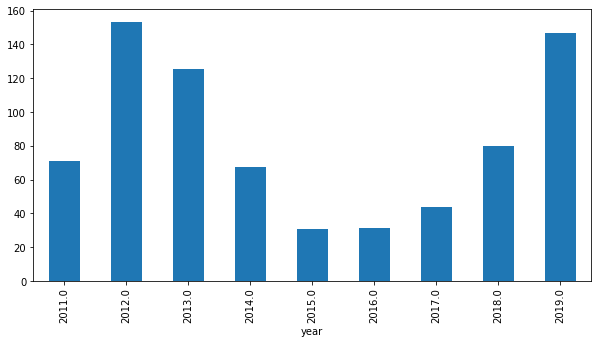

In [26]:
fig=plt.figure(figsize=(10,5))
df.groupby('year')['availability_365'].mean().plot(kind = 'bar')

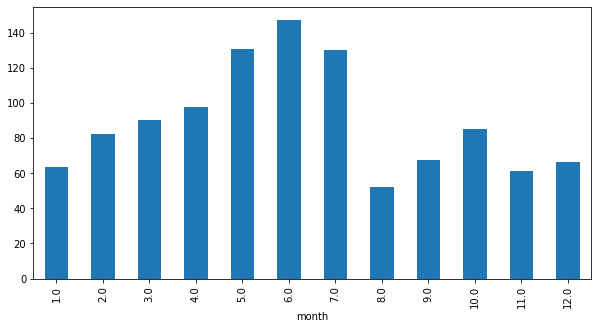

In [27]:
fig=plt.figure(figsize=(10,5))
df.groupby('month')['availability_365'].mean().plot(kind = 'bar')

In [28]:
df.year.value_counts()

2019.0    25209
2018.0     6050
2017.0     3205
2016.0     2707
2015.0     1393
2014.0      199
2013.0       48
2012.0       25
2011.0        7
Name: year, dtype: int64

In [29]:
df.year.isnull().sum()

10052

In [30]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,NaN,NaN,NaN
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,NaN,NaN,NaN
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,NaN,NaN,NaN
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,NaN,NaN,NaN


In [31]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468,0.407407,-0.051368,-0.018066
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492,0.265958,-0.030284,-0.014745
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983,-0.020564,-0.002245,-0.000055
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731,0.101660,0.000772,-0.013446
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829,-0.016636,0.003668,-0.007227
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303,-0.048419,-0.013352,0.003190
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028,0.272176,-0.005364,0.025760
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,0.423998,0.003139,-0.020864
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701,0.053089,-0.026610,0.015008
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000,0.312937,-0.034613,0.005710


In [32]:
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Woodrow                  1
Richmondtown             1
Fort Wadsworth           1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

# neighbourhood and last review date

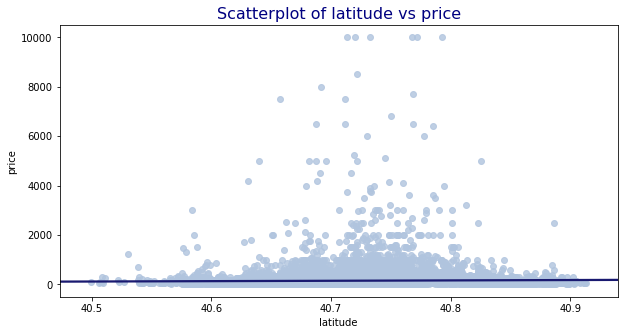

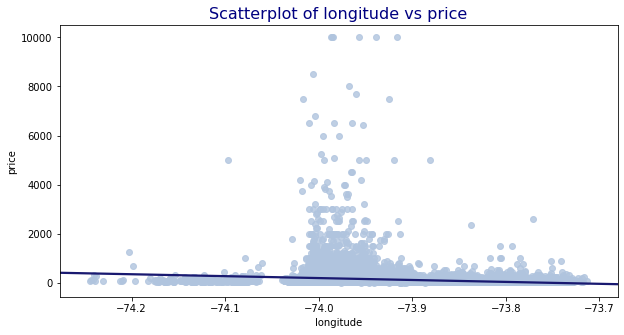

In [33]:
def scatter_target(df, ind_vars, target):
    for c in ind_vars:
        fig = plt.figure(figsize=(10, 5))
        sns.regplot(df[c], df[target], line_kws={'color':'midnightblue'}, color='lightsteelblue')
        plt.title('Scatterplot of '+ c + ' vs ' + target, color='navy', fontsize=16)
        plt.show()
        
ss=df[['latitude','longitude']]
scatter_target(df,ss,'price')

In [34]:
df['latitude_grp']=pd.qcut(df['latitude'],10,labels=['0','1','2','3','4','5','6','7','8','9'])
df['longitude_grp']=pd.qcut(df['longitude'],10,labels=['0','1','2','3','4','5','6','7','8','9'])

In [35]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0,0,3
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0,6,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,NaN,NaN,1,365,NaN,NaN,NaN,9,6
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0,2,4
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,0,NaN,NaN,2,9,NaN,NaN,NaN,1,5
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,0,NaN,NaN,2,36,NaN,NaN,NaN,3,7
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,0,NaN,NaN,1,27,NaN,NaN,NaN,9,6
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,0,NaN,NaN,6,2,NaN,NaN,NaN,7,1


In [36]:
data = df.drop(columns = ['id','name','host_id','host_name','last_review'],axis=1)

In [37]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,19.0,0,3
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,21.0,6,2
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN,NaN,NaN,9,6
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,5.0,2,4
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,19.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,NaN,NaN,NaN,1,5
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,NaN,NaN,NaN,3,7
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,NaN,NaN,NaN,9,6
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,NaN,NaN,NaN,7,1


In [38]:
contingency_table=pd.crosstab(data["neighbourhood_group"],data["neighbourhood"])

In [39]:
contingency_table

neighbourhood,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
neighbourhood_group,,,,,,,,,,,,,,,,,,,,,
Bronx,42,0,0,0,0,0,0,0,0,0,...,0,0,40,0,0,0,0,11,0,0
Brooklyn,0,0,0,0,0,17,0,141,0,0,...,0,0,0,3920,0,157,0,0,0,0
Manhattan,0,0,0,0,0,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Queens,0,0,0,77,900,0,0,0,6,0,...,0,11,0,0,0,0,88,0,0,235
Staten Island,0,4,21,0,0,0,0,0,0,2,...,2,0,0,0,1,0,0,0,1,0


In [40]:
Observed_Values = contingency_table.values 
Observed_Values

array([[ 42,   0,   0, ...,  11,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0, 235],
       [  0,   4,  21, ...,   0,   1,   0]], dtype=int64)

In [41]:
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[9.37151038e-01 8.92524798e-02 4.68575519e-01 ... 2.45444319e-01
  2.23131200e-02 5.24358319e+00]
 [1.72690050e+01 1.64466714e+00 8.63450251e+00 ... 4.52283465e+00
  4.11166786e-01 9.66241947e+01]
 [1.86064424e+01 1.77204213e+00 9.30322119e+00 ... 4.87311586e+00
  4.43010533e-01 1.04107475e+02]
 [4.86700072e+00 4.63523878e-01 2.43350036e+00 ... 1.27469066e+00
  1.15880969e-01 2.72320278e+01]
 [3.20400859e-01 3.05143675e-02 1.60200429e-01 ... 8.39145107e-02
  7.62859188e-03 1.79271909e+00]]


In [42]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
dm=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",dm)

Degree of Freedom:- 1


In [43]:
alpha=0.05


In [44]:
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 2360.6438051520727


In [45]:
critical_value=chi2.ppf(q=1-alpha,df=dm)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [46]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=dm)
print('p-value:',p_value)

p-value: 0.0


In [47]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dm)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2360.6438051520727
critical_value: 3.841458820694124
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [48]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,2018.0,10.0,19.0,0,3
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,2019.0,5.0,21.0,6,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,NaN,NaN,1,365,NaN,NaN,NaN,9,6
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,2019.0,7.0,5.0,2,4
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,2018.0,11.0,19.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,0,NaN,NaN,2,9,NaN,NaN,NaN,1,5
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,0,NaN,NaN,2,36,NaN,NaN,NaN,3,7
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,0,NaN,NaN,1,27,NaN,NaN,NaN,9,6
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,0,NaN,NaN,6,2,NaN,NaN,NaN,7,1


In [49]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,19.0,0,3
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,21.0,6,2
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN,NaN,NaN,9,6
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,5.0,2,4
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,19.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9,NaN,NaN,NaN,1,5
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36,NaN,NaN,NaN,3,7
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,NaN,NaN,NaN,9,6
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2,NaN,NaN,NaN,7,1


In [50]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [51]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,19.0,0,3
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,21.0,6,2
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,NaN,NaN,NaN,9,6
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,5.0,2,4
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,19.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,NaN,NaN,NaN,1,5
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,NaN,NaN,NaN,3,7
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,NaN,NaN,NaN,9,6
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,NaN,NaN,NaN,7,1


In [52]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,38843.000000,38843.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,2018.287722,6.173571,15.788276
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,1.181165,2.532065,9.882267
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,2018.000000,5.000000,6.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,2019.000000,6.000000,17.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2019.000000,7.000000,24.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000,31.000000


In [53]:
mm = df.host_name.value_counts()[:57]
mm

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Mike            194
Andrew          190
Anna            187
Laura           182
Chris           182
Melissa         160
Emily           157
Jennifer        154
James           151
Rachel          146
Kara            143
Jonathan        142
Amy             142
Brian           140
Michelle        140
Jason           140
Adam            139
Mark            139
Ben             135
Anthony         134
Eric            131
Andrea          131
Nina            128
Kevin           127
Peter           125
Lauren          124
Joseph          124
Nick            123
Stephanie       121
Ken             121
Sam             120
Lisa            119
Robert          118
Elizabeth       114
Nicole          111
Paul            110
Ryan            108
Matt            108
Matthew         107
Max             105


In [54]:
def Busyhost(x):
    if x in mm:
        return 'Busy Host'
    else:
        return 'Others'

In [55]:
df['host_status'] = df['host_name'].map(lambda x:Busyhost(x))

In [56]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year', 'month', 'day', 'latitude_grp',
       'longitude_grp', 'host_status'],
      dtype='object')

# Questions on Kaggle
What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# So the busiest hosts excel due to which factor?

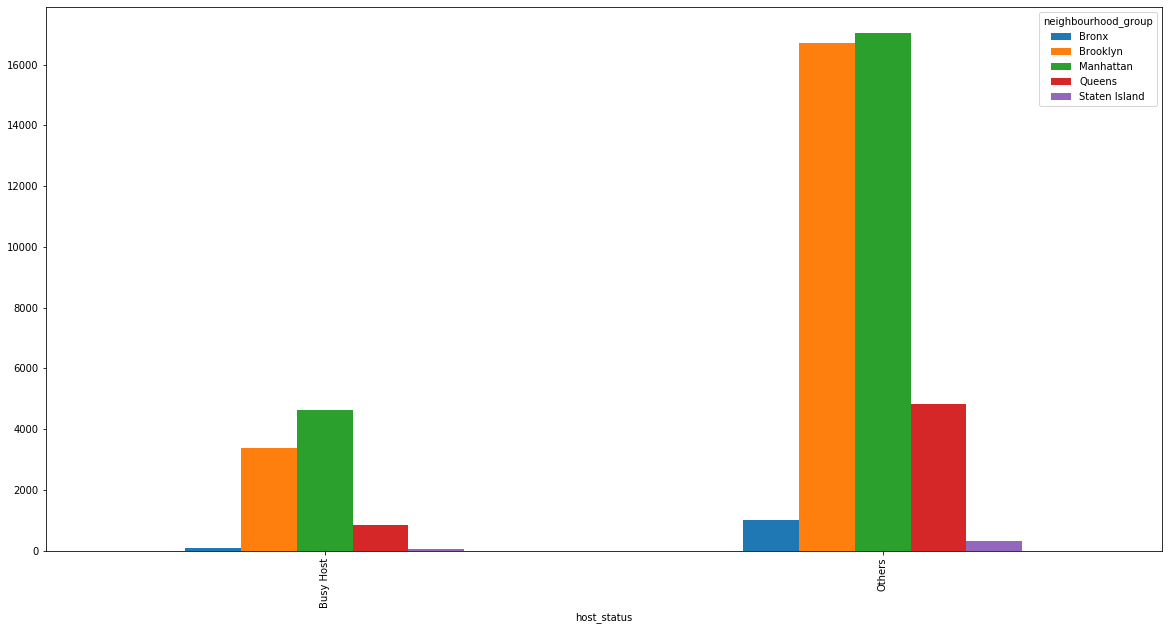

In [57]:
apn=df.groupby(['host_status','neighbourhood_group']).size().unstack()
apn.plot(kind='bar',stacked=False,figsize=(20,10))

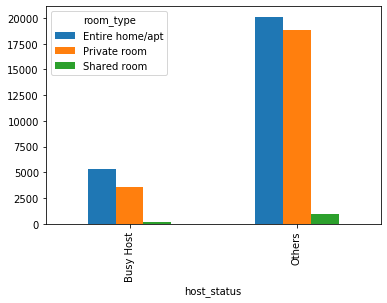

In [58]:
ann=df.groupby(['host_status','room_type']).size().unstack().plot(kind='bar')

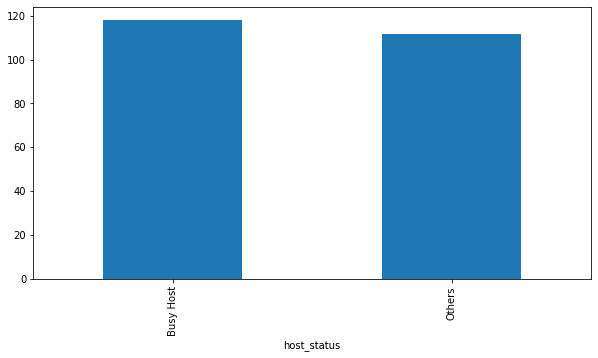

In [59]:
fig=plt.figure(figsize=(10,5))
df.groupby('host_status')['availability_365'].mean().plot(kind = 'bar')

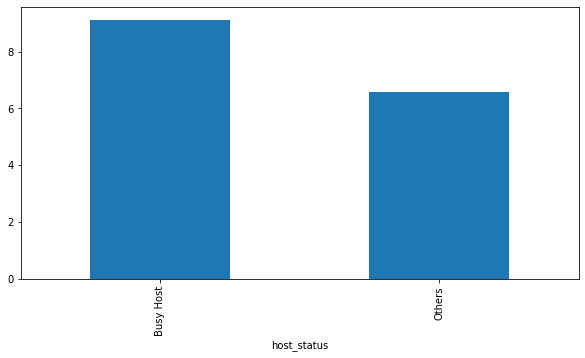

In [60]:
fig=plt.figure(figsize=(10,5))
df.groupby('host_status')['minimum_nights'].mean().plot(kind = 'bar')

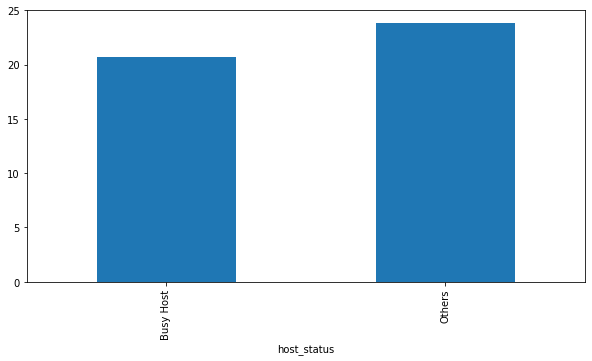

In [61]:
fig=plt.figure(figsize=(10,5))
df.groupby('host_status')['number_of_reviews'].mean().plot(kind = 'bar')

# from above graphs we can see that they excel due to the availabilty of the rooms and minimum nights offered

# Which locality records for most traffic and why

In [62]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

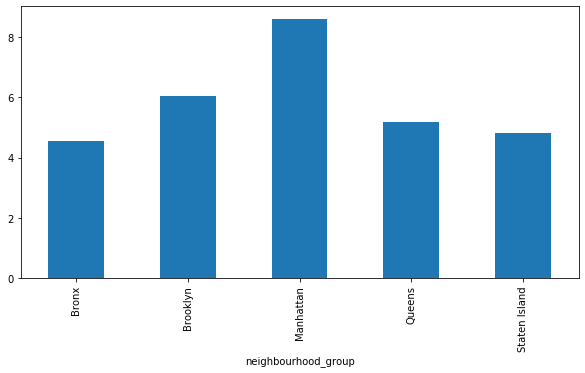

In [63]:
fig=plt.figure(figsize=(10,5))
df.groupby('neighbourhood_group')['minimum_nights'].mean().plot(kind = 'bar')

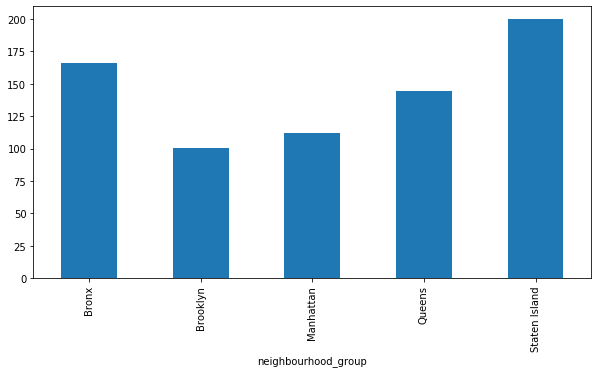

In [64]:
fig=plt.figure(figsize=(10,5))
df.groupby('neighbourhood_group')['availability_365'].mean().plot(kind = 'bar')

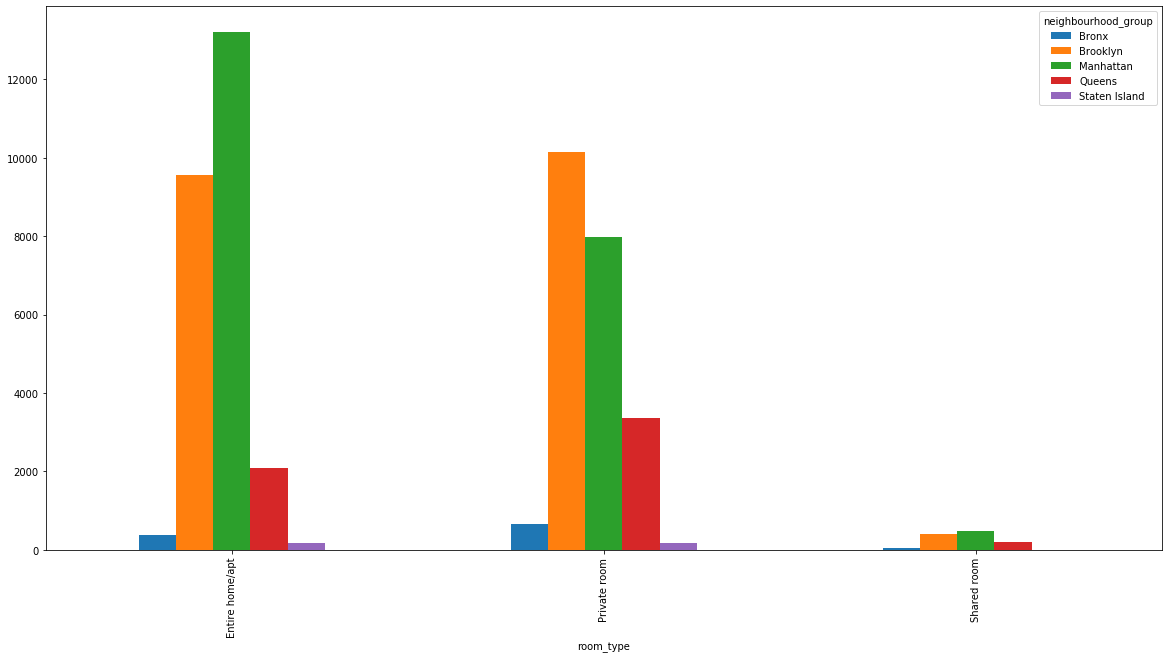

In [65]:
apn=df.groupby(['room_type','neighbourhood_group']).size().unstack()
apn.plot(kind='bar',stacked=False,figsize=(20,10))

# Brooklyn and Manhattan priovide more night stays and also good variety in room types. Thus, they record for more traffic due to high demand.

In [66]:
ccc = df.corr()

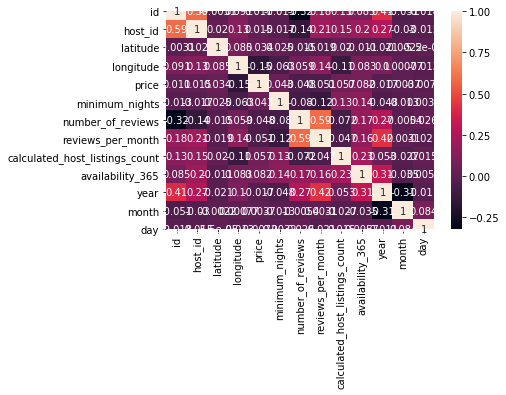

In [67]:
sns.heatmap(ccc,annot=True)

In [68]:
ccc

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468,0.407407,-0.051368,-0.018066
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492,0.265958,-0.030284,-0.014745
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983,-0.020564,-0.002245,-0.000055
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731,0.101660,0.000772,-0.013446
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829,-0.016636,0.003668,-0.007227
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303,-0.048419,-0.013352,0.003190
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028,0.272176,-0.005364,0.025760
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732,0.423998,0.003139,-0.020864
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701,0.053089,-0.026610,0.015008
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000,0.312937,-0.034613,0.005710


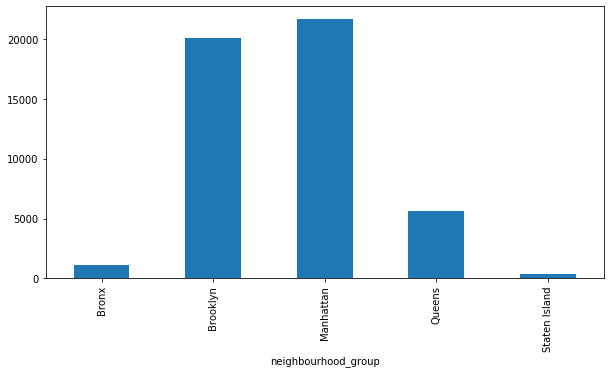

In [69]:
fig=plt.figure(figsize=(10,5))
df.groupby('neighbourhood_group')['number_of_reviews'].count().plot(kind = 'bar')

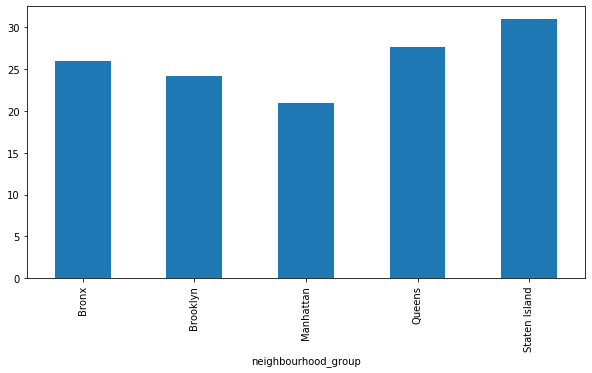

In [70]:
fig=plt.figure(figsize=(10,5))
df.groupby('neighbourhood_group')['number_of_reviews'].mean().plot(kind = 'bar')

In [71]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,38843.000000,38843.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,2018.287722,6.173571,15.788276
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,1.181165,2.532065,9.882267
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,2018.000000,5.000000,6.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,2019.000000,6.000000,17.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2019.000000,7.000000,24.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000,31.000000


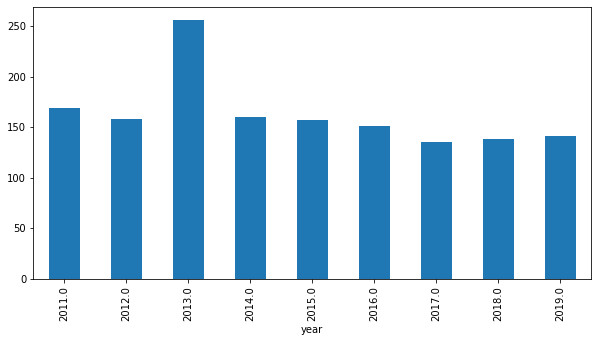

In [72]:
fig=plt.figure(figsize=(10,5))
df.groupby('year')['price'].mean().plot(kind = 'bar')

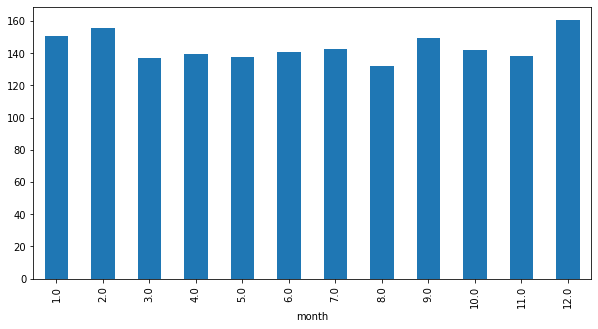

In [73]:
fig=plt.figure(figsize=(10,5))
df.groupby('month')['price'].mean().plot(kind = 'bar')

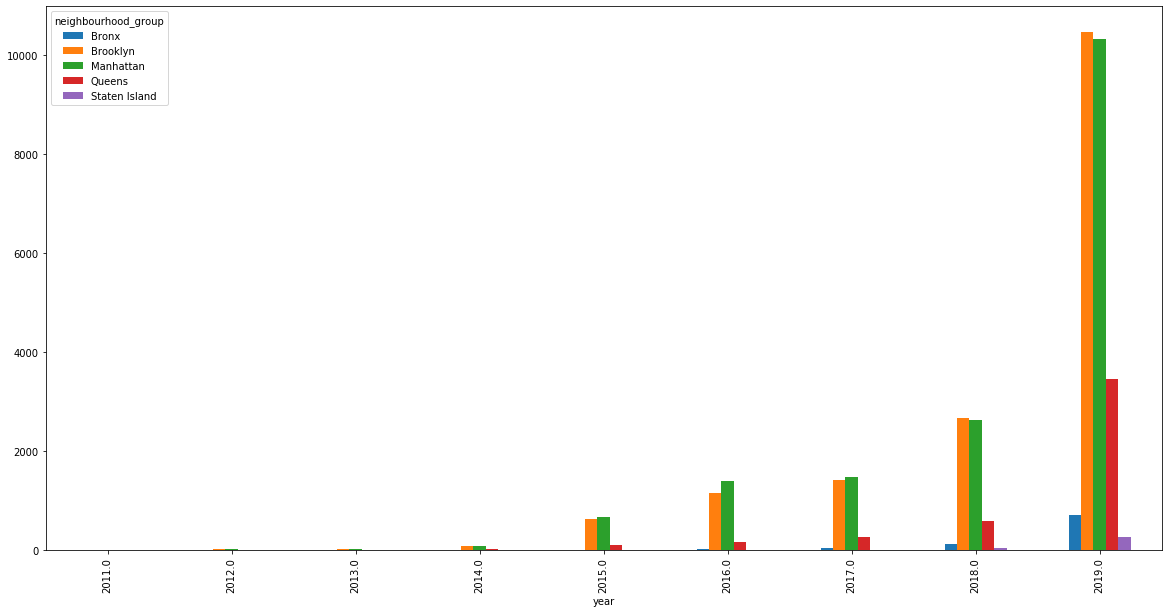

In [74]:
yrr=df.groupby(['year','neighbourhood_group']).size().unstack()
yrr.plot(kind='bar',stacked=False,figsize=(20,10))

In [75]:
import scipy

# subset the dataframe
BusyHost = df[df['host_status'] == 'Busy Host']['price']
Others = df[df['host_status'] == 'Others']['price']

# conduct two sample t-test

t_stat, p_value = scipy.stats.mstats.ttest_ind(BusyHost,Others)

# print the results
print(t_stat)
print(p_value)

if p_value<0.05:
    inference = 'Reject'

else:
    inference = 'Accept'

print(inference)

7.798298759020574
6.398362567716357e-15
Reject


In [76]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp,host_status
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,2018.0,10.0,19.0,0,3,Busy Host
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,2019.0,5.0,21.0,6,2,Busy Host
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,0.00,1,365,NaN,NaN,NaN,9,6,Others
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,2019.0,7.0,5.0,2,4,Others
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,2018.0,11.0,19.0,8,6,Busy Host
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,NaN,0.00,2,9,NaN,NaN,NaN,1,5,Others
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,NaN,0.00,2,36,NaN,NaN,NaN,3,7,Others
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,NaN,0.00,1,27,NaN,NaN,NaN,9,6,Others
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,NaN,0.00,6,2,NaN,NaN,NaN,7,1,Others


In [77]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018.0,10.0,19.0,0,3
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019.0,5.0,21.0,6,2
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,NaN,NaN,NaN,9,6
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019.0,7.0,5.0,2,4
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018.0,11.0,19.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,NaN,NaN,NaN,1,5
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,NaN,NaN,NaN,3,7
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,NaN,NaN,NaN,9,6
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,NaN,NaN,NaN,7,1


In [78]:
ddd = data.drop(columns=['neighbourhood','latitude','longitude','year','month','day'])

In [79]:
ddd=pd.get_dummies(ddd)

In [80]:
ddd

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,...,longitude_grp_0,longitude_grp_1,longitude_grp_2,longitude_grp_3,longitude_grp_4,longitude_grp_5,longitude_grp_6,longitude_grp_7,longitude_grp_8,longitude_grp_9
0,149,1,9,0.21,6,365,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,225,1,45,0.38,2,355,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,150,3,0,0.00,1,365,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,89,1,270,4.64,1,194,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,70,2,0,0.00,2,9,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
48891,40,4,0,0.00,2,36,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48892,115,10,0,0.00,1,27,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
48893,55,1,0,0.00,6,2,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [81]:
from sklearn.feature_selection import RFE

In [ ]:
X = ddd.drop(['price'], axis=1)
y = ddd['price']
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=2, verbose=3)
rfe.fit(X, y)
for col, rank in zip(X.columns, rfe.ranking_):
    print(col, ' - ', rank)

In [ ]:
data

In [ ]:
eee = data.drop(columns=['neighbourhood','latitude_grp','longitude_grp','year','month','day'])

In [ ]:
eee=pd.get_dummies(eee)

In [ ]:
eee

In [ ]:
X = eee.drop(['price'], axis=1)
y = eee['price']
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=2, verbose=3)
rfe.fit(X, y)
for col, rank in zip(X.columns, rfe.ranking_):
    print(col, ' - ', rank)

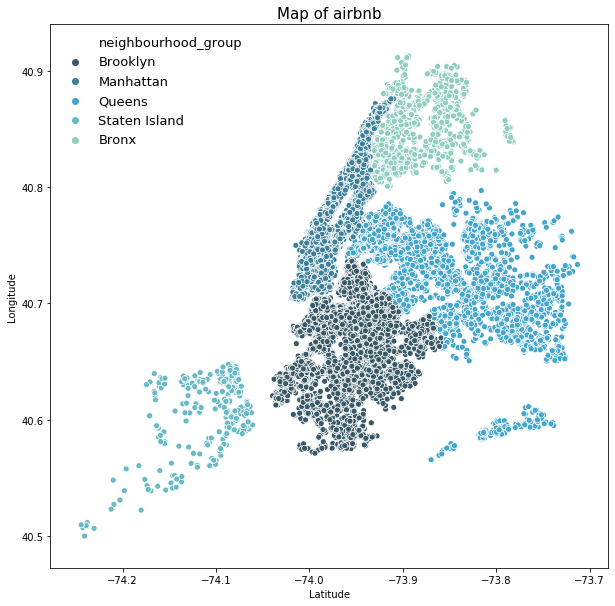

In [91]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

In [84]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp,host_status
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,2018.0,10.0,19.0,0,3,Busy Host
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,2019.0,5.0,21.0,6,2,Busy Host
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,0.00,1,365,NaN,NaN,NaN,9,6,Others
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,2019.0,7.0,5.0,2,4,Others
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,2018.0,11.0,19.0,8,6,Busy Host
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,NaN,0.00,2,9,NaN,NaN,NaN,1,5,Others
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,NaN,0.00,2,36,NaN,NaN,NaN,3,7,Others
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,NaN,0.00,1,27,NaN,NaN,NaN,9,6,Others
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,NaN,0.00,6,2,NaN,NaN,NaN,7,1,Others


In [86]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,38843.000000,38843.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,2018.287722,6.173571,15.788276
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,1.181165,2.532065,9.882267
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2011.000000,1.000000,1.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,2018.000000,5.000000,6.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,2019.000000,6.000000,17.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,2019.000000,7.000000,24.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2019.000000,12.000000,31.000000


In [89]:
df["year"].fillna(2019, inplace = True)
df["month"].fillna(6, inplace = True)
df["day"].fillna(17, inplace = True) 

In [90]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day,latitude_grp,longitude_grp,host_status
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,2018-10-19,0.21,6,365,2018.0,10.0,19.0,0,3,Busy Host
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,2019-05-21,0.38,2,355,2019.0,5.0,21.0,6,2,Busy Host
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,NaN,0.00,1,365,2019.0,6.0,17.0,9,6,Others
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,2019-07-05,4.64,1,194,2019.0,7.0,5.0,2,4,Others
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,2018-11-19,0.10,1,0,2018.0,11.0,19.0,8,6,Busy Host
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,NaN,0.00,2,9,2019.0,6.0,17.0,1,5,Others
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,NaN,0.00,2,36,2019.0,6.0,17.0,3,7,Others
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,NaN,0.00,1,27,2019.0,6.0,17.0,9,6,Others
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,...,NaN,0.00,6,2,2019.0,6.0,17.0,7,1,Others


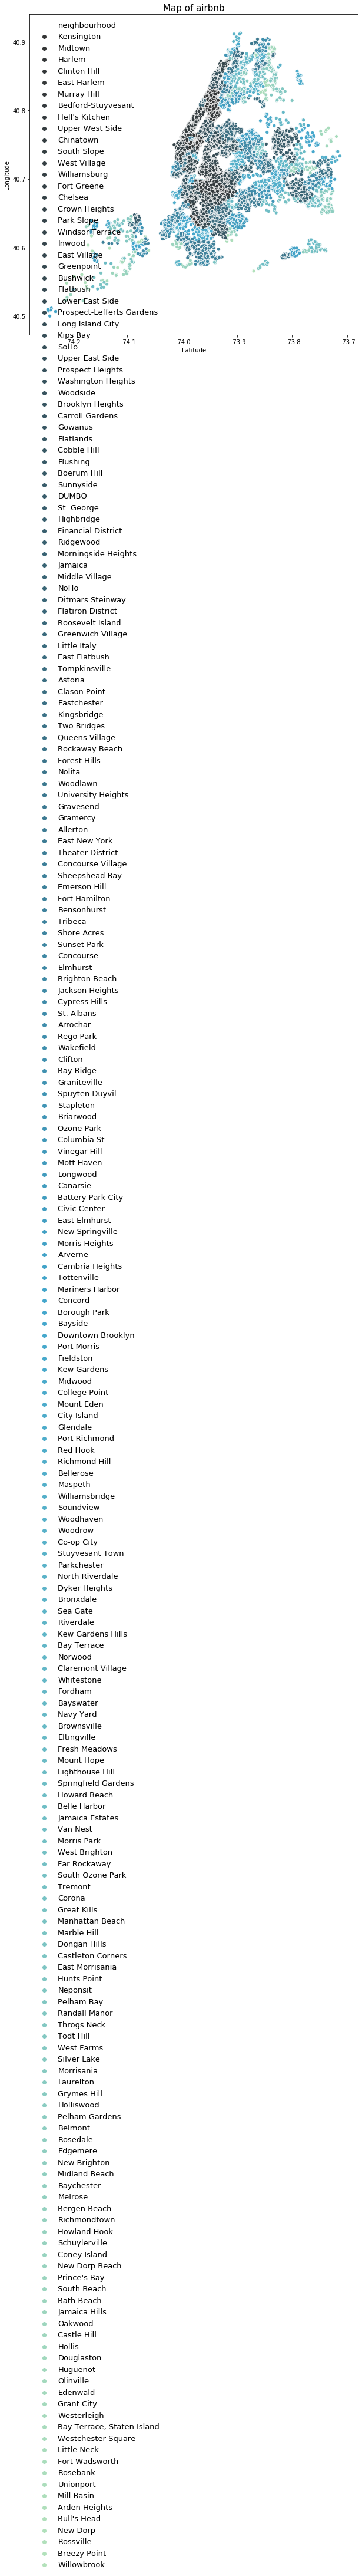

In [92]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood', palette='GnBu_d')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

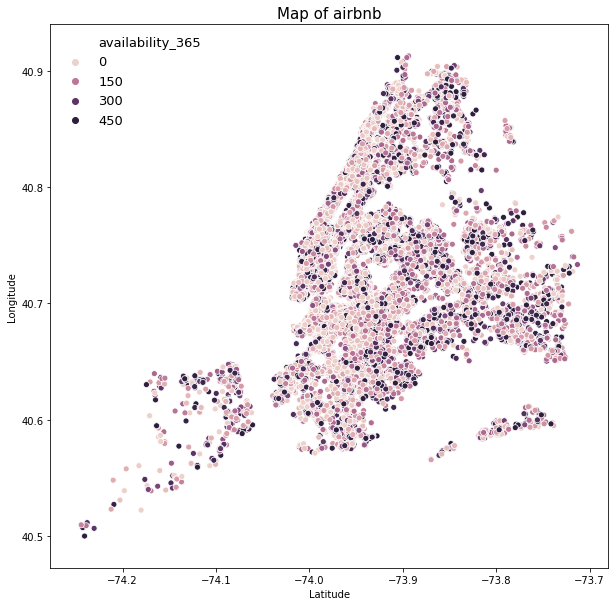

In [95]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='availability_365')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

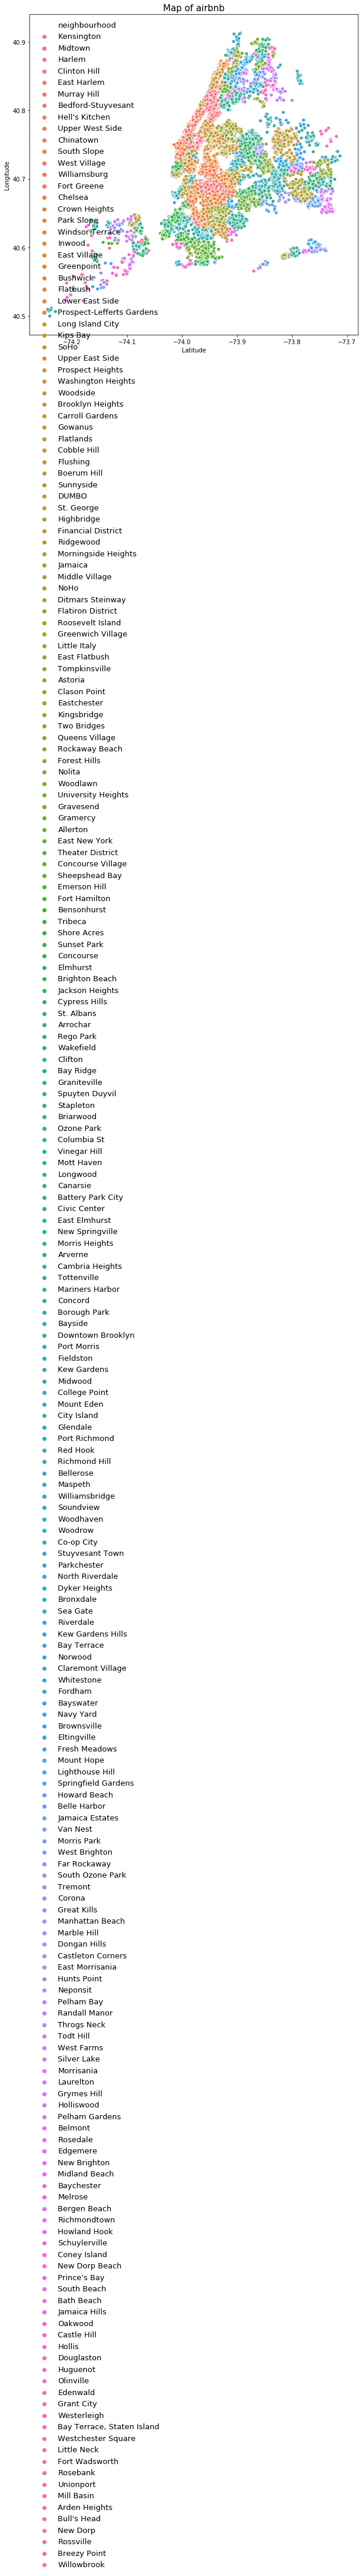

In [102]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

In [103]:
rfr=RandomForestRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
et=ExtraTreeRegressor()
gr=GradientBoostingRegressor()

In [105]:
exp_tup={0:(lr,'LinearRegression'),1:(rfr,'RandomForestRegressor'),2:(dt,'DecisionTreeRegressor'),3:(et,'ExtraTreeRegressor'),4:(gr,'GradientBoostingRegressor')}

In [106]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year', 'month', 'day', 'latitude_grp',
       'longitude_grp', 'host_status'],
      dtype='object')

In [107]:
mmm=df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'number_of_reviews', 'last_review'])

In [108]:
mmm=pd.get_dummies(mmm)

In [111]:
M = mmm.drop('price',1)
N = mmm['price']
M_train,M_test,N_train,N_test=train_test_split(M,N,train_size=0.7,random_state=7)

In [115]:
from sklearn import metrics

res_ls = []
for k in exp_tup.keys():
    model = exp_tup[k][0]
    name = exp_tup[k][1]
    model.fit(M_train, N_train)
    N_pred = model.predict(M_test)
    
    mae = metrics.mean_absolute_error(N_test, N_pred)
    mse = metrics.mean_squared_error(N_test, N_pred)
    rmse = np.sqrt(metrics.mean_squared_error(N_test, N_pred))
    r2 = metrics.r2_score(N_test, N_pred)

    res_ls.append((name,mae,mse,rmse,r2))
res_df = pd.DataFrame(res_ls)
res_df.columns = ['model','mae','mse','rmse','r2']
res_df.sort_values('rmse',ascending=True,inplace=True)

In [116]:
res_df

,model,mae,mse,rmse,r2
4,GradientBoostingRegressor,65.789253,45830.989101,214.081735,0.121126
0,LinearRegression,70.511825,46754.032988,216.226809,0.103426
1,RandomForestRegressor,68.906575,50804.641893,225.398851,0.025750
2,DecisionTreeRegressor,86.129704,86580.541998,294.245717,-0.660304
3,ExtraTreeRegressor,89.790415,113391.226739,336.736138,-1.174436


# removing dates

In [118]:
sss=df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'number_of_reviews', 'last_review', 'year', 'month', 'day'])

In [119]:
sss=pd.get_dummies(sss)

In [120]:
Q = sss.drop('price',1)
W = sss['price']
Q_train,Q_test,W_train,W_test=train_test_split(Q,W,train_size=0.7,random_state=7)

In [121]:
from sklearn import metrics

res_ls = []
for k in exp_tup.keys():
    model = exp_tup[k][0]
    name = exp_tup[k][1]
    model.fit(Q_train, W_train)
    W_pred = model.predict(Q_test)
    
    mae = metrics.mean_absolute_error(W_test, W_pred)
    mse = metrics.mean_squared_error(W_test, W_pred)
    rmse = np.sqrt(metrics.mean_squared_error(W_test, W_pred))
    r2 = metrics.r2_score(W_test, W_pred)

    res_ls.append((name,mae,mse,rmse,r2))
res_df = pd.DataFrame(res_ls)
res_df.columns = ['model','mae','mse','rmse','r2']
res_df.sort_values('rmse',ascending=True,inplace=True)

In [122]:
res_df

,model,mae,mse,rmse,r2
4,GradientBoostingRegressor,65.864851,45816.133310,214.047035,0.121411
0,LinearRegression,70.630180,46741.328096,216.197429,0.103669
1,RandomForestRegressor,69.151579,51772.685201,227.536118,0.007186
2,DecisionTreeRegressor,83.346373,80541.262568,283.797926,-0.544492
3,ExtraTreeRegressor,86.445326,88829.028919,298.041992,-0.703421
